En este archivo, voy a realizar el EDA (Exploratory Data Analysis) o Análisis Exploratorio de los Datos del archivo correspondiente a la tabla user_items.

In [1]:
# Importación de las librerías necesarias para trabajar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

Leemos el archivo con el que vamos a trabajar

In [2]:
items = pd.read_parquet("user_items_complete.parquet")
items

,item_id,item_name,playtime_forever,playtime_2weeks,user_id
0,10,Counter-Strike,6,0,76561197970982479
1,20,Team Fortress Classic,0,0,76561197970982479
2,30,Day of Defeat,7,0,76561197970982479
3,40,Deathmatch Classic,0,0,76561197970982479
4,50,Half-Life: Opposing Force,0,0,76561197970982479
...,...,...,...,...,...
5153204,346330,BrainBread 2,0,0,76561198329548331
5153205,373330,All Is Dust,0,0,76561198329548331
5153206,388490,One Way To Die: Steam Edition,3,3,76561198329548331
5153207,521570,You Have 10 Seconds 2,4,4,76561198329548331


Nuestro conjunto de datos originalmente cuenta con 5153209 filas y 5 columnas.

El método describe en Pandas nos ayuda a tener un resumen del conjunto de datos para todas las columnas numéricas excluyendo los valores NaN(Not-a-Number or missing ).

In [3]:
# Le pasamos cómo parametro include='all' para obtener todo el resumen adicional de nuestro conjunto de datos.
items.describe(include='all') 

,item_id,item_name,playtime_forever,playtime_2weeks,user_id
count,5153209,5153209,5.153209e+06,5.153209e+06,5153209
unique,10978,10947,NaN,NaN,70912
top,205790,Dota 2 Test,NaN,NaN,phrostb
freq,49571,49571,NaN,NaN,7762
mean,NaN,NaN,9.914951e+02,9.104707e+00,NaN
std,NaN,NaN,5.418204e+03,1.403926e+02,NaN
min,NaN,NaN,0.000000e+00,0.000000e+00,NaN
25%,NaN,NaN,0.000000e+00,0.000000e+00,NaN
50%,NaN,NaN,3.400000e+01,0.000000e+00,NaN
75%,NaN,NaN,3.550000e+02,0.000000e+00,NaN


Vemos con esto que por ejemplo, hay 70912 usuarios con ID único, y que no hay núlos en ninguna de las 5 columnas.

Veamos ahora la información de este conjunto de datos.  

In [4]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5153209 entries, 0 to 5153208
Data columns (total 5 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   item_id           object
 1   item_name         object
 2   playtime_forever  int64 
 3   playtime_2weeks   int64 
 4   user_id           object
dtypes: int64(2), object(3)
memory usage: 196.6+ MB


Veamos los valores nulos

In [5]:
items.isnull().sum() # No hay nulos

item_id             0
item_name           0
playtime_forever    0
playtime_2weeks     0
user_id             0
dtype: int64

Veamos ahora la distribución con un histograma del tiempo invertido por los usuarios (playtime_forever).

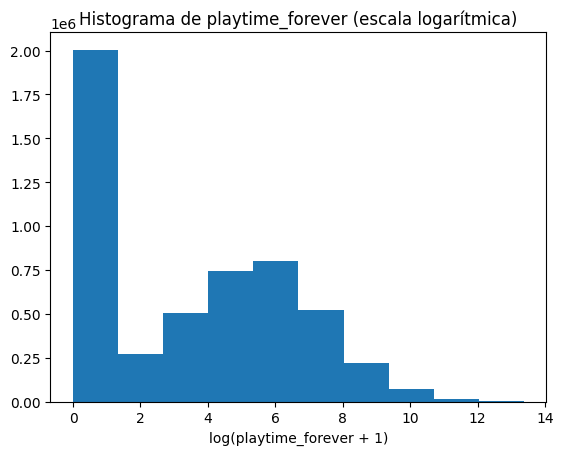

In [6]:
plt.hist(np.log1p(items['playtime_forever']))
plt.title('Histograma de playtime_forever (escala logarítmica)')
plt.xlabel('log(playtime_forever + 1)')
plt.show()

Tuve que aplicar una normalización a escala logaritmica para que el histograma se viera correctamente.
En el eje x lo que vemos es una escala que va de la siguiente manera:

Tiempo = ln(x + 1), Ejemplo: x = 1, Tiempo = ln(1 + 1) = ln(2) ≈ 0,6931471806 

Ahora, ese x = 1 yo no sé en que unidades está, suponiendo que está en minutos, entonces el resultado también es en minutos. 

Si nos quedamos con x = 1, vemos que la gráfica llega hasta 2.00 * 1e6, ¿Que significa esto?
La respuesta es que hay más de 2.000.000 de filas dentro del Dataframe que están dentro de ese tiempo.

Hablando con un lenguaje un poco menos tecnico, tenemos 2 millones de filas en dónde usuarios (pueden repetirse algunos) jugaron entre 0 y 2 minutos (sin incluir ni el 0 ni el 2).  

- ln = Logaritmo natural, logaritmo base e
- 1e6 = 1 x 10^6 = 1.000.000. El eje Y está en escala de 1e6, osea de 1 millón.

Los 10 juegos más jugados:
item_name
Counter-Strike: Global Offensive    785184267
Garry's Mod                         448366616
Terraria                            154974541
The Elder Scrolls V: Skyrim         136678626
Warframe                            124027703
Counter-Strike: Source              112612047
Left 4 Dead 2                       102189423
PAYDAY 2                             99763914
Sid Meier's Civilization V           82380684
Rust                                 81120416
Name: playtime_forever, dtype: int64


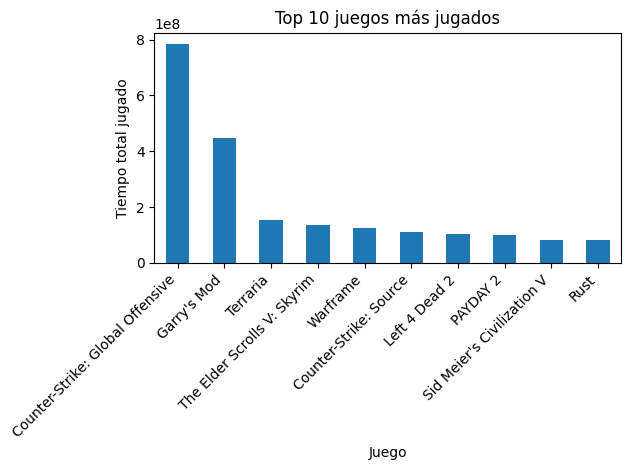

In [7]:
# Ahora quiero visualizar cuales son los juegos más jugados, para ello...
# Creo una variable que agrupa por item_name y suma playtime_forever
juegos_mas_jugados = items.groupby('item_name')['playtime_forever'].sum().sort_values(ascending=False)

# Veamos ahora los 10 juegos más jugados
print("Los 10 juegos más jugados:")
print(juegos_mas_jugados.head(10))

# Visualicemos con ayuda de Matplotlib
juegos_mas_jugados.head(10).plot(kind='bar')
plt.title('Top 10 juegos más jugados')
plt.xlabel('Juego')
plt.ylabel('Tiempo total jugado')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Ahora veamos los usuarios que invirtieron más horas de su tiempo jugando videojuegos.

Los 10 usuarios que acumulan más tiempo jugando:
user_id
REBAS_AS_F-T          4660393
shinomegami           3303502
Sp3ctre               2822860
DownSyndromeKid       2790419
Terminally-Chill      1734007
stopgovtcorruption    1717609
Steamified            1693063
Cow666                1674805
PiozZ                 1570365
76561198022404680     1378726
Name: playtime_forever, dtype: int64


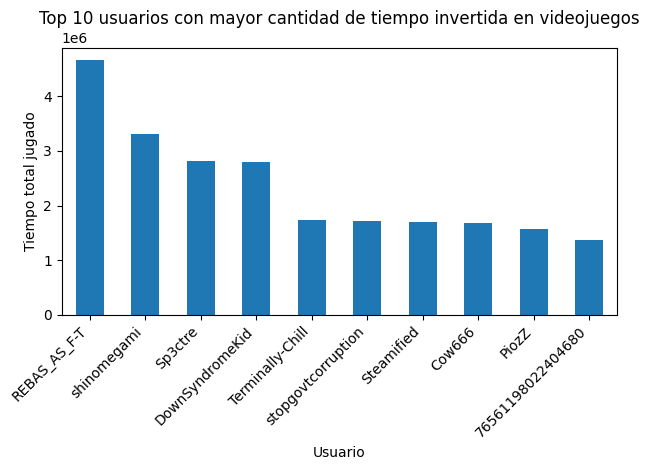

In [8]:
# Creo una variable que agrupa por user_id y suma playtime_forever
usuarios_con_mas_horas = items.groupby('user_id')['playtime_forever'].sum().sort_values(ascending=False)

# Veamos ahora los 10 juegos más jugados
print("Los 10 usuarios que acumulan más tiempo jugando:")
print(usuarios_con_mas_horas.head(10))

# Visualicemos con ayuda de Matplotlib
usuarios_con_mas_horas.head(10).plot(kind='bar')
plt.title('Top 10 usuarios con mayor cantidad de tiempo invertida en videojuegos')
plt.xlabel('Usuario')
plt.ylabel('Tiempo total jugado')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [9]:
# Ahora analicemos al usuario que acumula más tiempo jugando videojuegos
usuarios_con_mas_horas.head(1)

user_id
REBAS_AS_F-T    4660393
Name: playtime_forever, dtype: int64

In [10]:
tiempo_acumulado_usuario_top = 4660393 # Tiempo acumulado por el usuario, no sabemos en que unidades está
# Suponiendo que el tiempo está medido en horas, entonces podemos determinar la cantidad de días invertidos por el usuario dividiendo la cantidad de tiempo por 24.
dias_invertidos = tiempo_acumulado_usuario_top / 24
print(f"Si el tiempo está medido en horas, el usuario invirtió {dias_invertidos} días jugando")

Si el tiempo está medido en horas, el usuario invirtió 194183.04166666666 días jugando


In [11]:
# ¿ Y cuantos años serían esa cantidad de días ?
años_acumulados = dias_invertidos / 365
print(f"Si el tiempo está medido en horas, el usuario invirtió {años_acumulados} años jugando")

Si el tiempo está medido en horas, el usuario invirtió 532.0083333333333 años jugando


Bueno, con esto podemos concluir una de dos cosas:

1. Hubo un error de medición en los usuarios que invirtieron más tiempo.
2. El tiempo dentro de la columna "playtime_forever" no está medido en horas. 

Ahora, suponiendo que la segunda premisa es cierta, veamos que pasaría si el tiempo estuviese medido en minutos.

In [12]:
horas_acumuladas_usuario_top = tiempo_acumulado_usuario_top / 60
print(f"Si el tiempo está medido en minutos, el usuario acumula {horas_acumuladas_usuario_top} horas jugando")

Si el tiempo está medido en minutos, el usuario acumula 77673.21666666666 horas jugando


In [13]:
# Continuemos con los días...
dias_acumulados_usuario_top = horas_acumuladas_usuario_top / 24
print(f"Si el tiempo está medido en minutos, el usuario acumula {dias_acumulados_usuario_top} días jugando")

Si el tiempo está medido en minutos, el usuario acumula 3236.3840277777776 días jugando


In [14]:
# Sigamos con los años...
años_acumulados_usuario_top = dias_acumulados_usuario_top / 365
print(f"Si el tiempo está medido en minutos, el usuario acumula {años_acumulados_usuario_top} años jugando")

Si el tiempo está medido en minutos, el usuario acumula 8.866805555555555 años jugando


Bueno, vemos que es un poco más lógico pensar que la unidad de tiempo está en minutos, nuevamente, es un dato bastante relevante, del que desgraciadamente, no poseo información.

Analicemos un poco más en detalle al usuario que acumula más horas

In [15]:
user_id_usuario_top = "REBAS_AS_F-T" # Creamos una variable con su user_id
informacion_usuario_top = items[items["user_id"] == user_id_usuario_top] # Filtramos el dataset de juegos para obtener sólo los juegos que tiene el usuario top
informacion_usuario_top # Mostramos en pantalla

,item_id,item_name,playtime_forever,playtime_2weeks,user_id
1944570,1900,Earth 2160,0,0,REBAS_AS_F-T
1944571,2810,X3: Reunion,0,0,REBAS_AS_F-T
1944572,3830,Psychonauts,2176,0,REBAS_AS_F-T
1944573,4000,Garry's Mod,1673,0,REBAS_AS_F-T
1944574,6880,Just Cause,0,0,REBAS_AS_F-T
...,...,...,...,...,...
1946534,524030,Machine Learning: Episode I,0,0,REBAS_AS_F-T
1946535,527440,Rustangelo,0,0,REBAS_AS_F-T
1946536,324810,TOXIKK,0,0,REBAS_AS_F-T
1946537,528580,Found,0,0,REBAS_AS_F-T


El usuario tiene 1969 juegos dentro de la plataforma Steam, pero vemos que no ha jugado a algunos de ellos. Filtremos nuevamente dejando sólo aquellos a los que si les ha dedicado tiempo.

In [16]:
informacion_usuario_top[informacion_usuario_top["playtime_forever"] != 0]

,item_id,item_name,playtime_forever,playtime_2weeks,user_id
1944572,3830,Psychonauts,2176,0,REBAS_AS_F-T
1944573,4000,Garry's Mod,1673,0,REBAS_AS_F-T
1944583,7670,BioShock,146,0,REBAS_AS_F-T
1944585,8600,RACE 07,101,0,REBAS_AS_F-T
1944587,420,Half-Life 2: Episode Two,31,0,REBAS_AS_F-T
...,...,...,...,...,...
1946512,515200,Cliff Hanger,4303,4303,REBAS_AS_F-T
1946514,517000,Sakura Shrine Girls,3695,3695,REBAS_AS_F-T
1946517,517710,Redout,11,0,REBAS_AS_F-T
1946525,521470,Magical Otoge Ciel,7136,4742,REBAS_AS_F-T


Ahora quiero ver gráficamente cuáles fueron los 10 juegos más jugados por este usuario, para ello, hago lo siguiente:

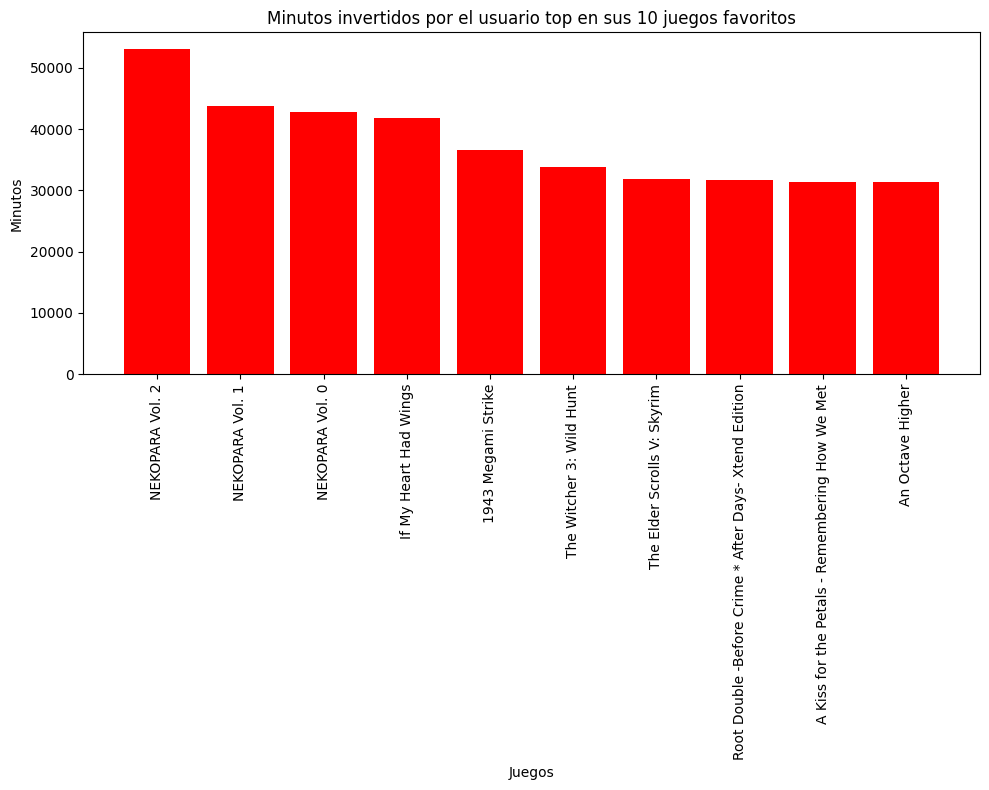

In [25]:
# Definimos cómo valores y la cantidad de minutos pasados por el usuario en los juegos en los que invirtió más tiempo 
y = informacion_usuario_top["playtime_forever"].sort_values(ascending=False).head(10)

# Definimos cómo valores x a los nombres de los juegos en los que el usuario jugó más tiempo.
x = informacion_usuario_top.sort_values(ascending=False, by="playtime_forever").head(10)["item_name"]

# Creamos el gráfico de barras
plt.figure(figsize=(10, 8))  # Aumentamos el tamaño de la figura para mejor visibilidad
plt.bar(range(len(x)), y, color='r')

# Personalizamos el gráfico
plt.xlabel('Juegos')
plt.ylabel('Minutos')
plt.title('Minutos invertidos por el usuario top en sus 10 juegos favoritos')

# Ajustamos las etiquetas del eje x
plt.xticks(range(len(x)), x, rotation=90)

# Ajustamos los márgenes
plt.tight_layout()

# Mostramos el gráfico
plt.show()

Si recordamos, nuestros juegos más jugados eran los que se muestran a continuación.

In [27]:
juegos_mas_jugados # Ahora, determinemos que cantidad de usuarios jugaron este primer juego.

item_name
Counter-Strike: Global Offensive    785184267
Garry's Mod                         448366616
Terraria                            154974541
The Elder Scrolls V: Skyrim         136678626
Warframe                            124027703
                                      ...    
Island Flight Simulator                     0
Pets Fun House                              0
The Eigengrau Menagerie                     0
Ian's Eyes                                  0
Football Manager 2017                       0
Name: playtime_forever, Length: 10947, dtype: int64

In [29]:
items[(items["item_name"] == "Counter-Strike: Global Offensive") & (items["playtime_forever"] > 0)]

,item_id,item_name,playtime_forever,playtime_2weeks,user_id
178,730,Counter-Strike: Global Offensive,23532,0,76561197970982479
962,730,Counter-Strike: Global Offensive,265,0,js41637
1271,730,Counter-Strike: Global Offensive,1569,0,evcentric
1506,730,Counter-Strike: Global Offensive,4167,0,Riot-Punch
1907,730,Counter-Strike: Global Offensive,19800,0,doctr
...,...,...,...,...,...
5152587,730,Counter-Strike: Global Offensive,20016,96,76561198310819422
5152636,730,Counter-Strike: Global Offensive,23,0,76561198312638244
5152651,730,Counter-Strike: Global Offensive,2317,0,76561198313357718
5152652,730,Counter-Strike: Global Offensive,2987,0,POMFP0MF


Cómo podemos observar, de los 70912 usuarios, 43279 de ellos invirtieron al menos más de un minuto en el Counter-Strike. Veamos esto representado en un gráfico de torta.

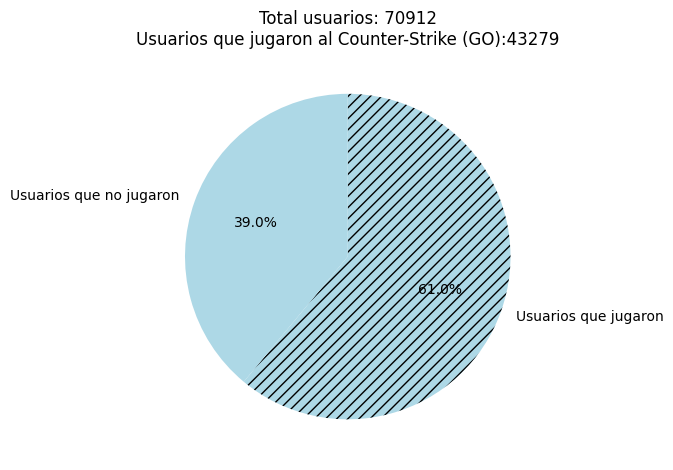

In [41]:
# Función para crear el gráfico de torta
def crear_grafico_torta(total, parcial):

    # Calculamos la diferencia entre la cantidad total y la cantidad parcial
    diferencia = total - parcial

    # Creamos los datos para el gráfico
    tamaños = [parcial, diferencia]
    labels = ['Usuarios que jugaron', 'Usuarios que no jugaron']

    # Creamos el gráfico
    fig, ax = plt.subplots()

    # Dibujamos el gráfico de torta
    wedges, texts, autotexts = ax.pie(tamaños, labels=labels, autopct='%1.1f%%',
                                      startangle=90, counterclock=False)

    # Aplicar el patrón rayado solo a la porción 'Parcial'
    wedges[0].set_hatch('///')

    # Colorear las porciones
    wedges[0].set_facecolor('lightblue')  # Color para la porción 'Parcial'
    wedges[1].set_facecolor('lightblue')  # Color para la porción 'Resto'

    # Añadir un título
    ax.set_title(f"Total usuarios: {total}\nUsuarios que jugaron al Counter-Strike (GO):{parcial}")

    # Ajustar el diseño
    plt.tight_layout()

    # Mostrar el gráfico
    plt.show()

# Definimos el total cómo la cantidad total de usuarios
total = 70912

# Definimos la cantidad parcial cómo la cantidad de usuarios que jugaron al juego
parcial = 43279

# Aplicamos la función
crear_grafico_torta(total, parcial)

Ahora quiero hacer algo similar pero con el tiempo de juego.
Quiero saber cuanto porcentaje de tiempo invirtieron los usuarios en el juego más jugado con respecto a la cantidad total de tiempo invertido por todos los usuarios jugando a todos los juegos.

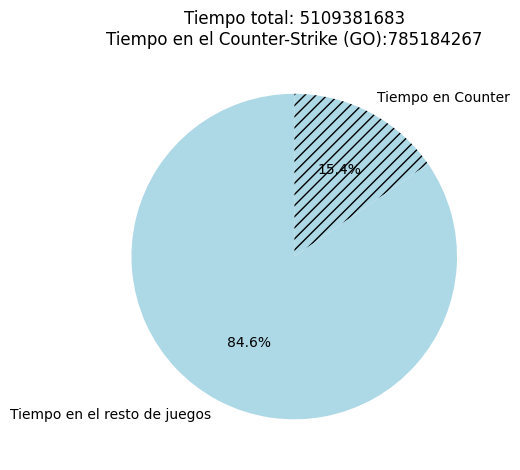

In [44]:
timepo_total = juegos_mas_jugados.sum()
tiempo_en_counter = 785184267

# Función para crear el gráfico de torta
def crear_grafico_torta(total, parcial):

    # Calculamos la diferencia entre la cantidad total y la cantidad parcial
    diferencia = total - parcial

    # Creamos los datos para el gráfico
    tamaños = [parcial, diferencia]
    labels = ['Tiempo en Counter', 'Tiempo en el resto de juegos']

    # Creamos el gráfico
    fig, ax = plt.subplots()

    # Dibujamos el gráfico de torta
    wedges, texts, autotexts = ax.pie(tamaños, labels=labels, autopct='%1.1f%%',
                                      startangle=90, counterclock=False)

    # Aplicar el patrón rayado solo a la porción 'Parcial'
    wedges[0].set_hatch('///')

    # Colorear las porciones
    wedges[0].set_facecolor('lightblue')  # Color para la porción 'Parcial'
    wedges[1].set_facecolor('lightblue')  # Color para la porción 'Resto'

    # Añadir un título
    ax.set_title(f"Tiempo total: {total}\nTiempo en el Counter-Strike (GO):{parcial}")

    # Ajustar el diseño
    plt.tight_layout()

    # Mostrar el gráfico
    plt.show()

# Aplicamos la función
crear_grafico_torta(timepo_total, tiempo_en_counter)

Con esto doy por finalizado el EDA para el archivo de user_items